## Instructions
- See deadline on the course web page
- See examination rules on the course web page.
- This problem set is performed individually (collaboration is encouraged, but each individual must be able to explain all of his/her hand-in solutions).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [1]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Sanogo'  # string
student['Firstname']='Ibrahim' # string
student['CID']='sanogo'        # string
student['DOB-year']=1999        # four-digit integer
student['DOB-month']=1          # integer in the range [1, 12]
student['DOB-day']=16           # integer in the range [1, 31]

# 
# YOUR CODE HERE
# 

In [2]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 3
## Basic problems
### Learning from data [TIF285], Chalmers, Fall 2020

Last revised: 24-Sep-2020 by Christian Forssén [christian.forssen@chalmers.se]

In [3]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 1: Assigning probabilities for a hundred-sided dice¶
### (2 points)

Consider a hundred-sided dice (labeled with 1, 2, 3, ..., 100) for which you know that the average result is 10.

Use the principle of maximum entropy to assign the probabilities $\{ p_i \}_{i=1}^{100}$ for the outcomes of a dice roll.

*Hint: Use the method of Lagrange multipliers. See, e.g., Gregory section 8.6-7.*

*There are two constraints from the known information: the normalization of the probabilities $\sum_i p_i = 1$ and the average result $\sum_i i p_i = 10$. In lack of other information, it is best to set the Lebesque measure $m_i = \mathrm{constant}$.*

### Task
* Assign the probabilities and make a bar plot. Store the probabilities in an array `probs` of length 100.
* The distribution looks like an exponential $e^{-\lambda^* i}$. What is its decay constant $\lambda^*$? Store the best fit decay constant in the variable `lam_star`

In [4]:
# importing modules

%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing,linear_model
import random
from sklearn.model_selection import train_test_split
import time 
from scipy.optimize import fsolve

# 
# 
# YOUR CODE HERE
# 

Lambda star =  [0.10533092]


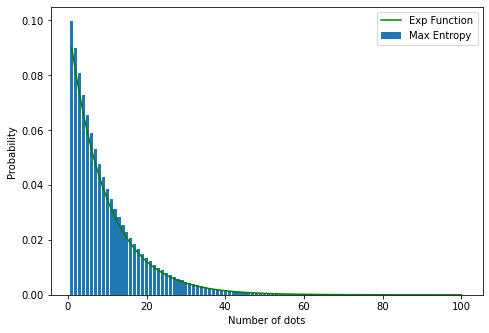

In [5]:
# We suggest to define helper functions
#
def diff_constrained_entropy(lam,mu,N):
    '''Returns the differential of the constrained entropy for an N-sided die 
    with mean mu and lagrange multiplier lam'''
    i = np.arange(1,N+1)
    return np.sum(i*1/N*np.exp(i*-lam))-mu*np.sum(1/N*np.exp(i*-lam))

def probi(lam,N):
    '''Returns an array (length N) of probabilities given the lagrange multiplier lam.'''
    i = np.arange(1,N+1)
    lam0= 1 / np.sum(1/N*np.exp(-lam*i))
    p= 1/N*np.exp(-lam*i)*lam0
    
    return p
    
# and to use the principle of maximum entropy to assign the probabilities 
probs = np.empty(100)
lam_star=0.0
mu = 10 
N=100 

lam_star= fsolve(diff_constrained_entropy,lam_star,args=(mu,N))
probs= probi(lam_star,N)
X_axis=np.linspace(1,100,100)
print("Lambda star = ", lam_star)
pExp = np.exp(-lam_star*X_axis)/mu

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_axis,probs, label = 'Max Entropy')
ax.plot(X_axis,pExp, color = 'green', label = 'Exp Function')
ax.set_xlabel('Number of dots')
ax.set_ylabel('Probability')
ax.legend (loc='best')


In [6]:
assert len(probs) == 100, 'The array should be of length 100'
assert 0<lam_star<1.0, 'The decay constant is in [0,1]'
# check the results
iside = np.arange(N)+1
avg = np.sum(iside*probs)
assert np.abs(avg-10.00)<0.00001, f'The average of the discrete probability distribution {avg}!=10.' 


## Problem 2: Hypothesis testing using p-values
### (2 points)

Assume that you are analyzing a time series of data from an experiment that is searching for an annual modulation on top of a constant background (e.g. a signal that would be proportional to the flux of dark matter particles which is expected to have an annual modulation). 

The time series of data consists of $N = 20$ measurements that extends over a period of 5 years. The measurements are presented in some re-scaled, dimensionless units. From calibration measurements it is known that errors are statistically distributed with a standard deviation $\sigma = 5.0$.

### Tasks
* Read the data which has been generated using three different (unknown) scenarios: with different amplitudes of the annual modulation signal
* Consider the scenario that the signal is *constant*, with an unknown amplitude as a null hypothesis.
* Compute, for each case, the chi-squared statistics: $\chi^2 = \sum_{i=1}^N \frac{( y_i - \bar{y} )^2}{\sigma^2}$, where the average value $\bar{y}$ is estimated from the sample $\{ y_i \}_{i=1}^{N}$.
* Make a plot of the expected $\chi^2$ distribution for the relevant number of degrees of freedom and compare with the statistic obtained for the actual data in each case.
* What is the *P-value* or *significance* of the data (for each case) from a frequentist point of view?
* Assume that we have decided beforehand the significance level 5% for this test. Would you *reject the null hypothesis with 95% confidence* for each particular case?

In [7]:
# importing modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing,linear_model
import random
from sklearn.model_selection import train_test_split
import time 
from scipy.optimize import fsolve
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chisquare
def ki2 (dy,y): 
    mean_y = np.mean(y)
    return np.sum((y - mean_y)**2) / dy**2


Read data for case  0
Read data for case  1
Read data for case  2
[0.31  0.042 0.061]


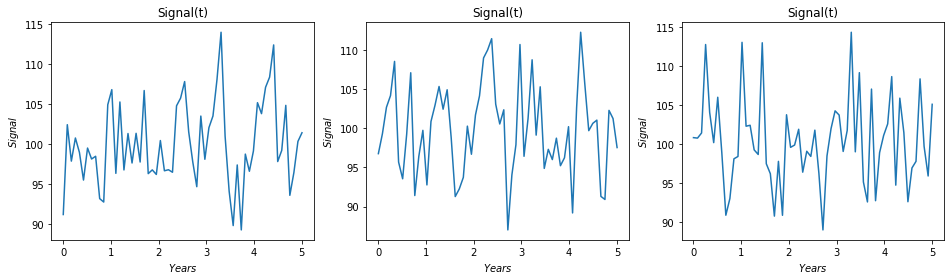

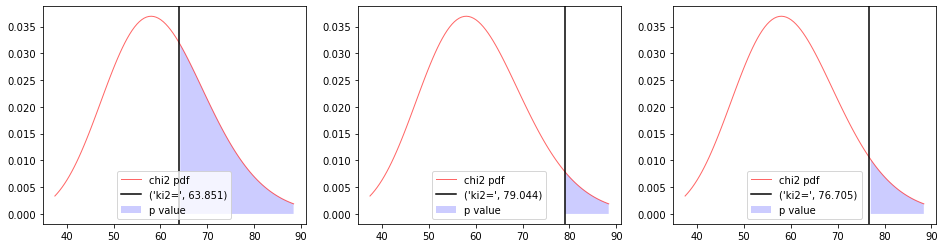

In [8]:
# Read the data and perform the tasks listed above
#
# Save the p-value in the list variable `pvalue`
pvalue = [0., 0., 0.]
# Should the null hypothesis be rejected? Save your answer in the list boolean variable `reject_null`

reject_null = [False, False, False]
    
fig_signal,axs_signal = plt.subplots(1, 3, figsize=(16, 4))
fig_chi2,axs_chi2 = plt.subplots(1, 3, figsize=(16, 4))
yStock=[]

for icase, amp_annual in enumerate([5., 5., 5.]):
    print(f'Read data for case {icase:>2}')
    t,y = np.loadtxt(f'{DATA_DIR}/problem2_data{icase}.dat',unpack=True)
    axs_signal[icase].plot((t/365),y)
    axs_signal[icase].set_xlabel(r'$Years$')
    axs_signal[icase].set_ylabel(r'$Signal$')
    axs_signal[icase].set_title('Signal(t)')
    yStock.append(y)
      
    
    
dy = len(y)
Ki2Val=np.zeros(3)

for i in range(3):
    Ki2Val[i] = ki2(5,yStock[i])
    x = np.linspace(chi2.ppf(0.01, dy), chi2.ppf(0.99, dy), 100)
    axs_chi2[i].plot(x, chi2.pdf(x, dy),'r-', lw=1, alpha=0.6, label='chi2 pdf')
    axs_chi2[i].axvline(x=Ki2Val[i],color='black', label = ('ki2=',np.round(Ki2Val[i],3) ))
    axs_chi2[i].fill_between(x, chi2.pdf(x, dy), where=x>= Ki2Val[i] , facecolor='blue', interpolate=True,alpha=0.2, label='p value')
    axs_chi2[i].legend (loc='best',prop={'size': 10}) 
    pvalue[i]=(1-(chi2.cdf(Ki2Val[i], (dy-1))))
    


  


#x = np.linspace(chi2.ppf(0.01, dy), chi2.ppf(0.99, dy), 100)
#axs_chi2[0].plot(x, chi2.pdf(x, dy),'g-', lw=2, alpha=0.6, label='chi2 pdf'

print(np.round(pvalue,3))

#Assume that we have decided beforehand the significance level 5% for this test. Would you reject the null hypothesis with 95% confidence for each particular case?

#After looking at the Pvalues, we can assume that the null hypothesis with 95% confidence can be rejected for the problem_data[1], the second curve, indeed for this one we have the Pvalue < 0
#05. The other Pvalues being superior to 0.05 the pvalues cannot be rejected. 


  

In [9]:
assert len(reject_null)==3
assert len(pvalue)==3
assert not pvalue==[0.,0.,0.], 'update pvalue list'

## Problem 3: Gaussian Process regression
### (3 points)

In the following we will perform Gaussian Process regression of the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) ($\mu$) vs. [redshift](https://en.wikipedia.org/wiki/Redshift) ($z$) relation for a simulated set of 100 supernovas.

The data, 
$(z, \mu, \Delta \mu)$,
is generated from an underlying true distribution $p(z) \propto (z/z_0)^2 \exp[(z/z_0)^{1.5}]$ 
with $z_0 = 0.3$. An array with $(z_\mathrm{true}, \mu_\mathrm{true})$ is also available for comparison.

Credit: The data and a part of the problem formulation is obtained from the [AstroML]("http://www.astroml.org/") python module distributed under the 3-clause BSD license. For more information, see http://astroML.github.com.

In [10]:
# The GPy library is needed to solve this task
#
import GPy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 
# YOUR CODE HERE
# 

### Initialization task
Load the experimental data and the true function data and plot $\mu = \mu(z)$. 

In [11]:
# Load experimental data sample
z_sample, mu_sample, dmu = np.loadtxt(f'{DATA_DIR}/cosmology_sample.dat',unpack=True)

# data must be two-dimensional for GPy
x = z_sample.reshape((-1,1))
y = mu_sample.reshape((-1,1))
print('The experimental data is of shape:', y.shape)

The experimental data is of shape: (100, 1)


In [12]:
# Load true function
z, mu_true = np.loadtxt(f'{DATA_DIR}/cosmology_true.dat',unpack=True)

print('The true function data is of shape:', mu_true.shape)

The true function data is of shape: (1000,)


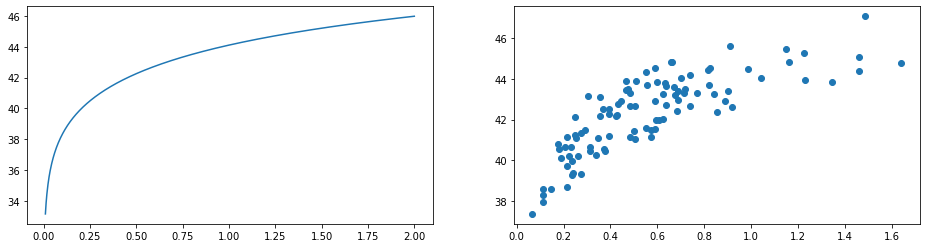

In [13]:
# Plot the data and the true function


fig,ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(z,mu_true)

ax[1].scatter(z_sample,mu_sample)


### Task 1 
Use the GPy python module to create a GP model with an RBF kernel. The GP model will contain a Gaussian noise term by default. 
* Print the hyperparameters of the kernel before doing optimization.
* Use GPy to optimize the model hyperparameters to the available data.
* Print the optimized GP model hyperparameters. Check in particular the Gaussian noise variance. Does it make sense given the uncertainites that were present in the experimental data?
* What is the log likelihood of the data with this GP model? (*Hint*: Use the GPy `model.log_likelihood()` function , where `model` is a GPy regression model)
* Plot the GP regression model together with the data (the GPy plot command will by default show the mean prediction and the 95% credibility region).

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


GP_regression.,value,constraints,priors
rbf.variance,1000.2044403715819,+ve,
rbf.lengthscale,3.017464600378477,+ve,
Gaussian_noise.variance,1.0005767169937756,+ve,


The likelyhookfunction is  -152.57170381374166


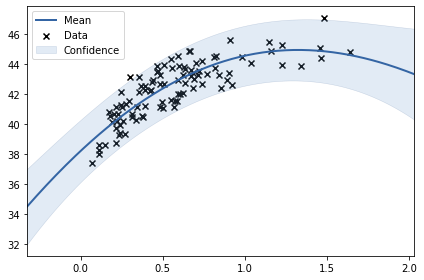

In [14]:

kernel = GPy.kern.RBF(1)
m = GPy.models.GPRegression(x,y,kernel)
display(m)
m.optimize()
display(m)
m.plot()
print("The likelyhookfunction is ", m.log_likelihood())
#Yes it seems to make sense

### Task 2
Repeat the GP model optimization, but initialize the hyperparameters with 
* RBF lengthscale = 1.2
* RBF variance = 1000

From this initial guess, use GPy to optimize the model hyperparameters to the available data.
* Print the optimized GP model hyperparameters. 
* What is the log likelihood of the data with this GP model? 
* Plot the GP regression model together with the data.
* What are the main differences of the fit in Task 2 and the one in Task 3?

#### The fit in task 3 will not be as smooth as the one in this task 

 D:\Program Files (x86)\anaconda3\envs\tif285-env\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


GP_regression.,value,constraints,priors
rbf.variance,1000.0000119807419,+ve,
rbf.lengthscale,1.4362310387952162,+ve,
Gaussian_noise.variance,0.9253990430421415,+ve,


The likelyhood function is  -151.9135392511946


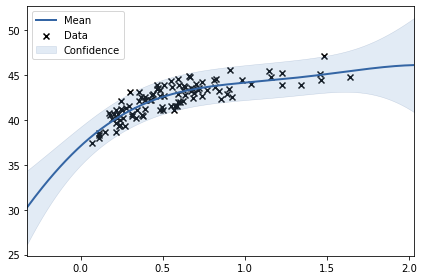

In [15]:

kernel = GPy.kern.RBF(input_dim=1, variance=1000, lengthscale=1.2)
m = GPy.models.GPRegression(x,y,kernel)
m.optimize()
display(m)
m.plot()
print("The likelyhood function is ", m.log_likelihood())


### Task 3
* Create an array `Xp = numpy.linspace(0.0,2.0,50)[:,None]` to be used for predictions.
* Extract the mean vector and the covariance matrix from your GPy model object, `model`, using the command `mu, C = model.predict(Xp,full_cov=True)`
* Draw 20 samples from the multivariate Gaussian defined by `mu, C`.
* Extract the mean vector and the standard deviation vector of the 20 samples.
* Plot the sampled curves in a figure together with the mean and the $1\sigma$ and $2\sigma$ bands. (*Hint*: Use `alpha=0.3` when plotting the sampled curves in order to make them somewhat transparent).
* How does the result from this finite number of samples compare to the model plot that was produced in Task 2?

(50,)
(50,) (50,) (50,)


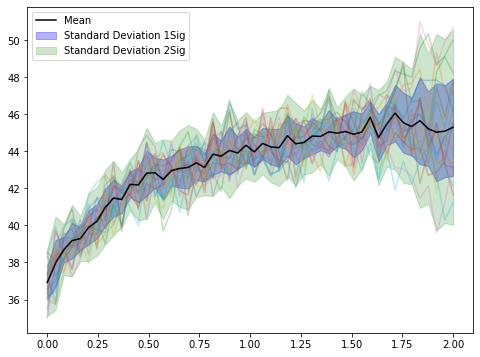

In [16]:
Xp = np.linspace(0.0,2.0,50)[:,None]

mu, C = m.predict(Xp,full_cov=True)
mu.flatten()
muvrai = np.zeros(50)
Xpband= np.zeros(50)
for i in range(50):
    muvrai[i]=mu[i]
    Xpband[i]=Xp[i]
print(muvrai.shape)
nsamples=20
Z = np.random.multivariate_normal(muvrai,C,nsamples)
stdVector = np.std(Z, axis=0)
TwostdVector = 2* np.std(Z, axis=0)

meanVector = np.mean(Z, axis=0)
t1= meanVector-stdVector
t2= meanVector+stdVector

t12 = meanVector-2*stdVector
t22= meanVector+2*stdVector
print(Xpband.shape,t1.shape,t2.shape)


fig, ax = plt.subplots(figsize=(8,6))
for i in range(nsamples):
    ax.plot(Xp[:],Z[i,:],alpha=0.3);
    
    
ax.plot(Xp[:],meanVector,color='black',label="Mean");
ax.fill_between(Xpband,t1, t2, color='b', alpha=.3,label='Standard Deviation 1Sig')
ax.fill_between(Xpband,t12, t22, color='g', alpha=0.2,label='Standard Deviation 2Sig')

ax.legend (loc='best')



### Written Questions : 

The result from this task is similar to the one in task 2. The GPy makes an efficient estimate of the mean and covariance of the model Xp and produces the mean and variance of the various points in Xp similar to that of task 2. But the result is not as smooth as the one in task 2 

## Problem 4: Single neuron classifier
### (3 points)

In [17]:

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set('talk')

### Background

The Ising model is arguably the most famous model in (condensed matter) physics. It is described by the simple Hamiltonian

$$
H=−J \sum_{\langle i,j \rangle} s_i s_j.
$$

Here, the $s_i=\{−1,1\}$ are classical, binary magnetic moments (spins) sitting on a two-dimensional square lattice and the $\langle i,j \rangle$ indicates that only interactions betweens neighboring spins are taken into account. For simplicity, we will set $J=1$.

Most importantly, the Ising model shows a phase transition between a paramagnetic and a ferromagnetic phase as a function of temperature. The critical temperature $T_c$ at which this change of magnetic character occurs has been calculated exactly by Lars Onsager. He found

$$
T_c = \frac{2}{\log \left( 1 + \sqrt{2} \right) }
$$

In [18]:
Tc = 2 / np.log(1+np.sqrt(2))
print(f"Critical temperature: Tc = {Tc:.4f}")

Critical temperature: Tc = 2.2692


In this problem we aim to reproduce this result (roughly) using a simple binary classifier (single neuron) that you implement yourself.

The classification problem can be made more sophisticated by introducing neural networks with several layers. Results from such an analysis made it all the way into a Nature Physics publication just a few years ago: [Nature Physics (2017) 13, 431–434](https://www.nature.com/articles/nphys4035)

We will start by quickly simulating the Ising model using the Monte Carlo method to obtain representative sets of spin configurations for a bunch of temperatures. 

#### Monte Carlo simulation
The Monte Carlo method for the Ising model is very straightforward: take a random configuration of spins to begin with and propose individual spin flips until you run out of steam. To decide whether a spin should be flipped we use the Metropolis criterium
$$
p=\min \left( 1, e^{-\beta\Delta E} \right)
$$
where $\Delta E = E′−E$ is the energy difference between the new (spin flipped) and the old configuration according to $H$ above and $\beta = 1/T$ is the inverse of the temperature $T$. Since $\Delta E$ only depends on the local environment of the spin to be flipped (nearest neighbors), we can evaluate it locally. 

#### Generate spin configurations and study the phase transition

In the python file attached with this notebook we have the definition of a `Lattice` class which can be used to generate a 2D lattice for `N` spins at a temperature `T`. Here, we simply import the `Lattice` class and use the `step` method to generate a lattice after a few hundred iterations to simulate a thermalization of the lattice. 

At every iteration, we select $N^2$ random points to try a flip attempt. A flip attempt consists of checking the change in energy due to a flip. If it is negative or less than $e^{-E/(k_b T)}$, then perform the flip. After a few steps the lattice with thermalize.



#### *You need the `lattice.py` file in the same directory to get this to work which contains the definition of `Lattice`*


In [19]:
from lattice import Lattice

In [20]:
# Initialize a lattice
lat = Lattice(N=10, T=4.5)

# Make 30 iterations (N**2 spin flip attempts)
for i in range(30):
    lat.step()

print(lat.lattice) # (or even `print lat` to use the convenient repr)

[[ 1  1 -1  1 -1  1 -1  1 -1  1]
 [ 1  1 -1 -1 -1  1 -1  1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1  1  1]
 [-1 -1 -1 -1  1  1  1  1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1 -1 -1  1 -1  1]
 [-1  1 -1  1 -1 -1  1  1 -1  1]
 [ 1  1  1  1 -1 -1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1  1  1  1  1]
 [ 1  1  1  1  1 -1  1  1  1 -1]]


#### Illustrate some spin configurations, and plot macroscopic quantities as a function of temperature

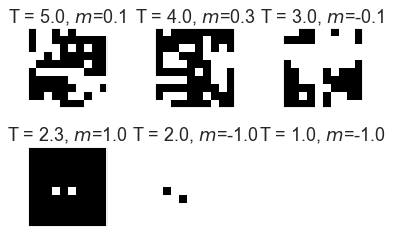

In [21]:
# 10 x 10 lattice
# six temperatures, 500 thermalization iterations
# Plot the spin configurations for varying temperatures.
# Display the magnetization too

nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols)
fig.subplots_adjust(wspace=0.6)

for (ip, T) in enumerate([5.0, 4.0, 3.0, 2.3, 2.0, 1.0]):
    lat = Lattice(N=10,T=T)
    for k in range(500):
        lat.step()

    idx = ip // ncols, ip % ncols

    axs[idx].matshow(lat.lattice,cmap=plt.cm.gray_r)
    axs[idx].set_title(f"T = {T:.1f}, $m$={lat.get_avg_magnetization():.1f}")

    axs[idx].get_xaxis().set_visible(False)
    axs[idx].get_yaxis().set_visible(False)

In [22]:
# 10 x 10 lattice
# 60 temperatures, 500 thermalization iterations

# For a temperature range, thermalize a lattice, then
# take a few hundred steps, recording energy and magnetization.
# Store the means to plot next.
# This takes about 60s with one modern core.

# Thermalization and measurement steps
ntherm = 500
nmeasure = 200

# points = array with (T, mean(E), abs(mean(M)), var(E))
# with the mean and variance evaluated for a list of many temperatures
points = []
# Storing nmeasure / nsparse data points
nsparse = 10
# points_full = array with (T, E, abs(M))
# for several different configurations per temperature
points_full=[]
for T in np.arange(4.0,1.0,-0.05):
    lat = Lattice(N=10,T=T)
    for _ in range(ntherm):
        lat.step()
    Es = []
    Ms = []

    for istep in range(nmeasure): 
        lat.step()
        Es.append(lat.get_energy())
        Ms.append(lat.get_avg_magnetization())
        if (istep%nsparse==0):
            points_full.append((T,Es[-1],np.abs(Ms[-1])))           
    Es = np.array(Es)
    Ms = np.array(Ms)
    points.append((T,Es.mean(),np.abs(Ms.mean()),Es.var()))
points = np.array(points)
points_full = np.array(points_full)

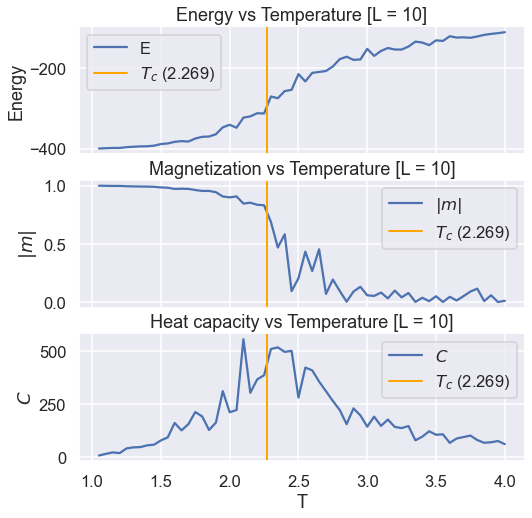

In [23]:
# Plot the energy, magnetization, and heat capacity vs temperature

fig, axs = plt.subplots(3,1,sharex=True,figsize=(8,8))

axs[0].plot(points[:,0],points[:,1], label="E")
axs[0].set_ylabel("Energy")
axs[0].set_title("Energy vs Temperature [L = 10]")

axs[1].plot(points[:,0],points[:,2], label="$|m|$")
axs[1].set_ylabel("$|m|$")
axs[1].set_title("Magnetization vs Temperature [L = 10]")

# heat capacity
# C = var(E) / ( k_B T**2)
heat_capacity = points[:,3] / (points[:,0]**2)
axs[2].plot(points[:,0],heat_capacity, label="$C$")
axs[2].set_xlabel("T")
axs[2].set_ylabel("$C$")
axs[2].set_title("Heat capacity vs Temperature [L = 10]")

for ax in axs:
    ax.axvline(x=Tc,linestyle='-', color="orange",linewidth=2.0, label="$T_c$ ({:.3f})".format(Tc))
    ax.legend(loc="best", numpoints=1)
    ax.grid(True)

#### Energy vs magnetization
Blue data is low temperature ($<T_c$) and red data is high temperature ($>T_c$).

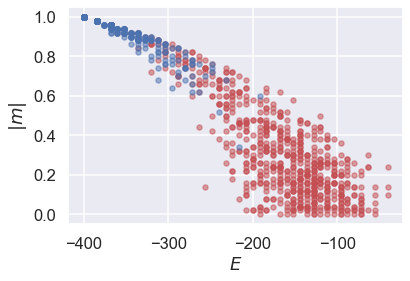

In [24]:
high_T = points_full[:,0]>Tc
low_T = points_full[:,0]<Tc

E_M_high = points_full[high_T][:,1:]
E_M_low = points_full[low_T][:,1:]

fig, ax = plt.subplots(1,1)
ax.scatter(E_M_high[:,0],E_M_high[:,1],c='r',alpha=0.5,s=25)
ax.scatter(E_M_low[:,0],E_M_low[:,1],c='b',alpha=0.5,s=25)
ax.set_xlabel("$E$")
ax.set_ylabel("$|m|$");

### Task: Single neuron binary classifier

Create a binary classifier that can take $(E,|m|)$ as input data and predict a binary label (0=below Tc, 1=above Tc).

Hints:
* Build your own binary classifier from a single neuron. Study the lecture notes and the exercise on logistic regression / neural networks.
* Normalize the data before training / testing (mean=0, standard deviation=1).
* Split into 70 % training data and 30% test data.
* Use weight decay alpha=1.0, learning parameter eta=0.01
* A rather large number of training iterations will be needed.

**How well does it perform? Plot the decision boundary.**

In [25]:
def sigmoid(a):
    '''Sigmoid function with input argument a that is the activation'''
    # 
    # YOUR CODE HERE
    # 
    return (1/(1+np.exp(-a)))

def single_neuron(x, w):
    """
    Single neuron prediction.
    
    Single output and N instances of k independent variables.
    
    Args:
        x (array[float]): input to the neuron. x.shape=(N,k) 
        w (array[float]): weights, w.shape=(k+1,)
            The zero index weight is the bias term.

    Returns:
        y (float): the output of the neuron
    """
    # 
    # YOUR CODE HERE
    # 
    if len(np.array([x[0],x[1]]).shape)==1:
        x = np.append(1, x)
    else:
        m = len(x)
        x = np.c_[np.ones((m, 1)), x] 
    assert(len(w)==x.shape[-1])

    a = np.dot(x,w)
    return sigmoid(a)

def train_single_neuron_binary_classifier(x,t,iters=5, alpha=0.1, eta=0.01):
    """
    Makes predictions for a single neuron binary classifier
    
    Args:
        x (array[float]): an array of input data
        t (float): target output for each data points
        iters (int): number of iterations to apply gradient descent
        alpha (float): a rescaling parameter for the weights
        eta (float): learning rate
        
    Return
        w (array[float]): the trained weights of the classifier 
    """
    EPSILON = 1e-07
    w=np.random.normal(size=(np.shape(x)[1]+1)) #nor
    cr=0
    for i in range (iters):
        for j in range(x.shape[0]):
            y = single_neuron(x[j], w) 
            #e = -t[j]*np.log(y) - (1-t[j])*np.log(1-y)
            gradient_logistic = -t[j]/(y+EPSILON) + (1-t[j])/(1-y+EPSILON)
            gradient_sigmoid = y*(1-y)
            x_a=x.copy()
            m=len(x)
            x_a=np.c_[np.ones((m, 1)), x_a]
            w = w - alpha*(gradient_logistic*gradient_sigmoid * x_a[j])  # make step, using learning rate eta# and weight decay alpha
    return w

In [26]:
assert sigmoid(0.0)==0.5, f'sigmoid(0.0)={sigmoid(0.0)}!=0.5'
assert (sigmoid(np.zeros(3))==0.5*np.ones(3)).all(), f'The sigmoid function should work with arrays'

x=np.array([[0,0],[1,1],[3,2]])
w=np.array([0.,1.,-1.])
output = single_neuron(x, w)
assert np.abs(output[0]-0.5)<0.01, f'output[0] = {output[0]}'


In [27]:
Tl=points_full[:,0]
energy=points_full[:,1]
magn=points_full[:,2]


with np.nditer(Tl, op_flags=['readwrite']) as it:
    for x in it:
        if x<Tc:
            x[...]=0
            
        else:
            x[...]=1
        


e_scaled = preprocessing.scale(energy) #normalization
m_scaled = preprocessing.scale(magn) #normalization



e_train,e_test,m_train,m_test,tl_train,tl_test= train_test_split(e_scaled,m_scaled,Tl,train_size=0.7,test_size=0.3,random_state=42)

EM_train=  np.vstack((e_train,m_train)).T
EM_test=  np.vstack((e_test,m_test)).T

#training of the net
W = train_single_neuron_binary_classifier(EM_train, tl_train, iters=30000, alpha=0.1, eta=0.01)


In [28]:
# Train the single neuron binary classifier
T_pred = single_neuron(EM_test,W)

Evaluate the final binary classifier and plot the 25%, 50%, 75% decision boundaries

In [29]:
# Evaluate the final binary classifier and plot the 25%, 50%, 75% decision boundaries
copy =T_pred.copy()
copy[copy<0.5] = 0
copy[copy>=0.5] = 1
high_copy = copy >0.5


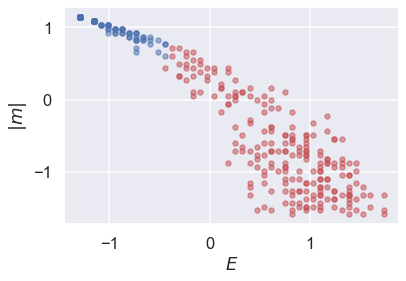

In [30]:
EM_test_cop=  np.vstack((e_test,m_test,copy)).T
E_M_high_cop = []
E_M_low_cop  = []
E_M_T  = []
for i in range (len(EM_test_cop)):
    if copy[i]==1:
        E_M_high_cop.append(EM_test_cop[i])
    else:
        E_M_low_cop.append(EM_test_cop[i])

E_M_high_cop= np.array(E_M_high_cop)
E_M_low_cop= np.array(E_M_low_cop)
EM_test_cop=np.array(EM_test_cop)


fig, ax = plt.subplots(1,1)
ax.scatter(E_M_high_cop[:,0],E_M_high_cop[:,1],c='r',alpha=0.5,s=25)
ax.scatter(E_M_low_cop[:,0],E_M_low_cop[:,1],c='b',alpha=0.5,s=25)
ax.set_xlabel("$E$")
ax.set_ylabel("$|m|$");

In [31]:
EM_cl=  np.vstack((e_scaled,m_scaled)).T
#pred
T_pred_class = single_neuron(EM_cl,W)
copy_cl =T_pred_class.copy()
copy_cl[copy_cl<0.5] = 0
copy_cl[copy_cl>=0.5] = 1

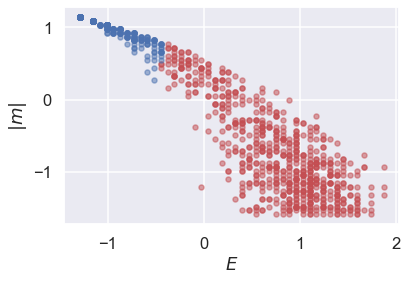

In [32]:
EM_cla=  np.vstack((e_scaled,m_scaled,copy_cl)).T
E_M_high_cl = []
E_M_low_cl  = []

for i in range (len(EM_cla)):
    if copy_cl[i]==1:
        E_M_high_cl.append(EM_cla[i])
    else:
        E_M_low_cl.append(EM_cla[i])

E_M_high_cl= np.array(E_M_high_cl)
E_M_low_cl= np.array(E_M_low_cl)
EM_cla=np.array(EM_cla)


fig, ax = plt.subplots(1,1)
ax.scatter(E_M_high_cl[:,0],E_M_high_cl[:,1],c='r',alpha=0.5,s=25)
ax.scatter(E_M_low_cl[:,0],E_M_low_cl[:,1],c='b',alpha=0.5,s=25)
ax.set_xlabel("$E$")
ax.set_ylabel("$|m|$");




In [33]:
def plot_decision_boundary(pred, X, y,ax=[]):
    # Set min and max values and give it some padding
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    # Predict the function value for the whole gid
    Z = single_neuron(np.c_[xx0.ravel(), xx1.ravel()],W)
    z_new=np.ones_like(Z)*(Z>0.5)
    z_new= z_new.reshape(xx0.shape)
    # Plot the contour and training examples
    if ax:
        ax.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.5)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    else:
        plt.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.5)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
        
def plot_decision_boundary2(pred, X, y,ax=[]):
    # Set min and max values and give it some padding
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    # Predict the function value for the whole gid
    Z = single_neuron(np.c_[xx0.ravel(), xx1.ravel()],W)
    z_new=np.ones_like(Z)*(Z>0.25)
    z_new= z_new.reshape(xx0.shape)
    Z = Z.reshape(xx0.shape)
    # Plot the contour and training examples
    if ax:
        ax.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.5)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    else:
        plt.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.5)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
        
def plot_decision_boundary3(pred, X, y,ax=[]):
    # Set min and max values and give it some padding
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    # Predict the function value for the whole gid
    Z = single_neuron(np.c_[xx0.ravel(), xx1.ravel()],W)
    z_new=np.ones_like(Z)*(Z>0.75)
    z_new= z_new.reshape(xx0.shape)
    # Plot the contour and training examples
    if ax:
        ax.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.5)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    else:
        plt.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.5)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)



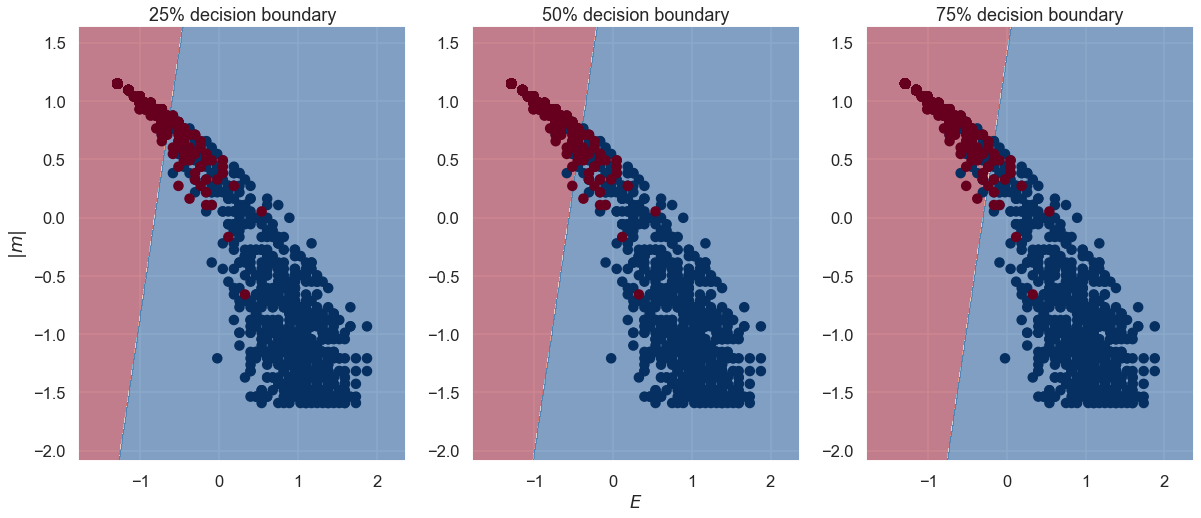

In [34]:
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(20,8))
fig.tight_layout
plot_decision_boundary2(copy_cl,EM_cla,Tl,ax1)
ax1.set_ylabel(r'$|m|$');
ax1.set_title("25% decision boundary")

plot_decision_boundary(copy_cl,EM_cla,Tl,ax2)
ax2.set_xlabel(r'$E$')
ax2.set_title("50% decision boundary")

plot_decision_boundary3(copy_cl,EM_cla,Tl,ax3)
ax3.set_title("75% decision boundary");

